# Predictive validity tutorial #1

### Simple data set containing `logD` as a single endpoint

In [1]:
import yaml
import os
import pandas as pd
from mosses.predictive_validity import evaluate_pv

The arguments required by `evaluate_pv()` can be passed as a dictionary of keyword arguments.\
Here we show that the arguments can be loaded for an example data set from a YAML file `logd_validation_1.yaml`.\
As part of preparing the arguments, `input_df` is used to load the corresponding dataframe needed by the function.

In [2]:
# Load dictionary from file
data_dir = os.path.join("data")
with open(os.path.join(data_dir, "logd_validation_1.yaml")) as f:
    config_dict = yaml.safe_load(f)

# Load dataframe from path
config_dict["input_df"] = pd.read_csv(os.path.join(data_dir, config_dict["input_df"]))

The arguments `pos_class` and `current_threshold` are specified by the user.\
These can be tweaked manually to find an optimal cut-off in the data to maximise the retrieval of true predictions and desired compounds.


### Overview 
---


|  | No. of Compounds |
| ------ | ----- |
| Compounds with measured values | 669 |
| Below Selected Experimental Threshold | 185 |
| Above Selected Experimental Threshold | 484 |
| Ratio of good compounds made so far | 72% |
| Prospective Validation Set | 458 |



--- 
### Experimental values over time 

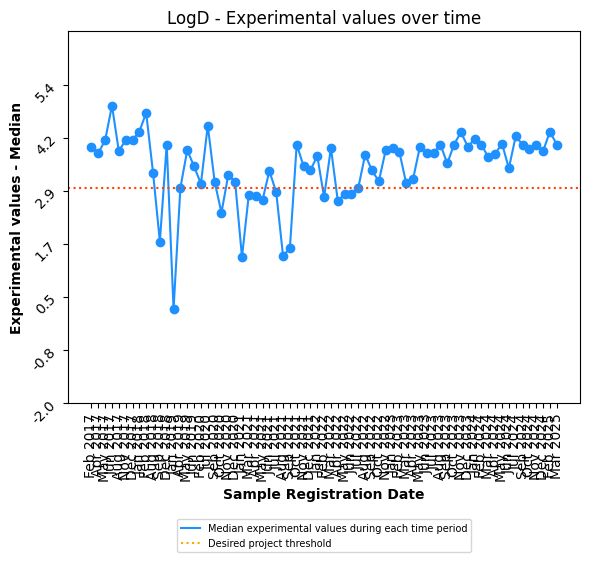


--- 
### Model evaluation 


#### Predicted vs Experimental Values (prospective) 


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R²) | 0.2 |
| Root Mean Squared Error (RMSE in log scale) | 0.62 |


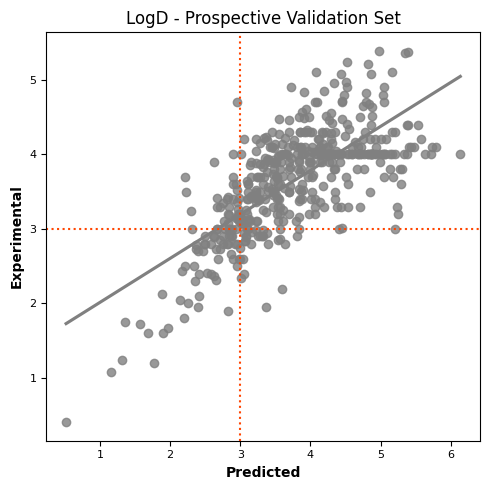


#### Predicted vs Experimental Values (training set) 


| Metric | Value |
| ------ | ----- |
| Experimental vs Predicted correlation (Coefficient of determination, R²) | 0.7 |
| Root Mean Squared Error (RMSE in log scale) | 0.63 |


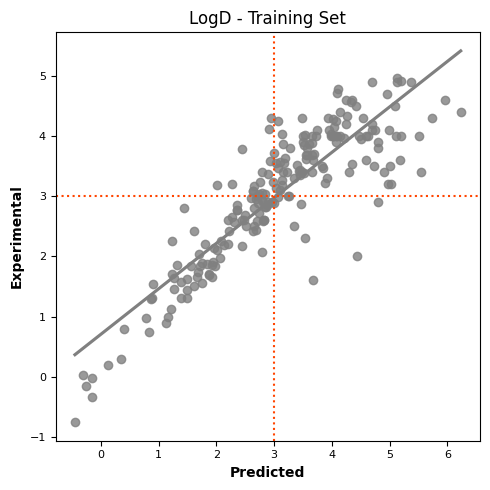


#### Model performance over time 


##### RMSE 

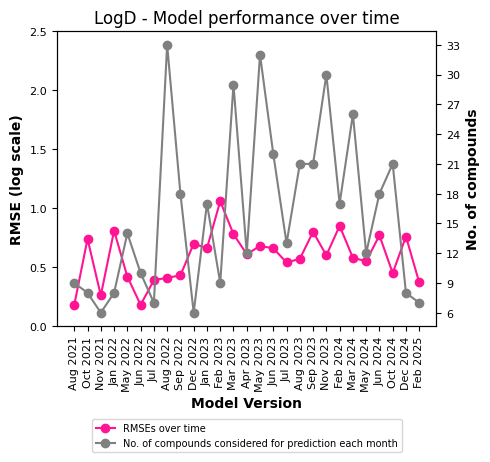


##### Similarity of prospective data to training set 

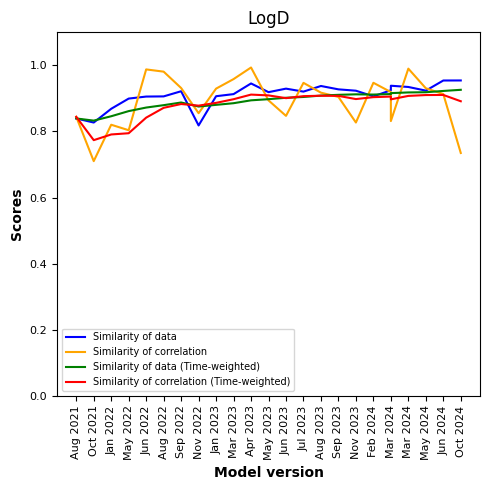


--- 
### Model usage advice 


#### What predicted threshold gives best enrichment 


|  | Predicted Threshold | PPV % | FOR % |
| ------ | ----- | ----- | ----- |
| Selected Experimental Threshold | 3 | 66 | 8 |
| Recommended Threshold | 2.7 | 89 | 13 |


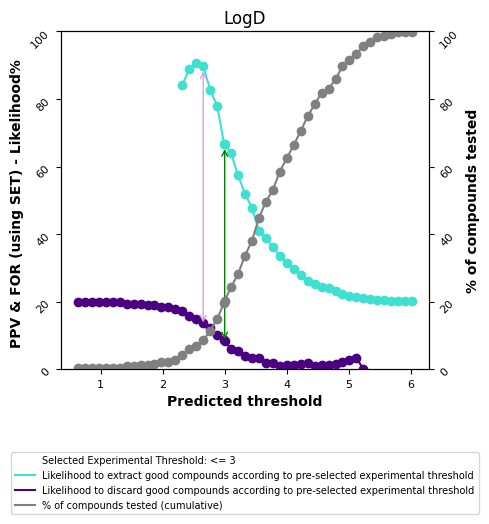


#### Explore other experimental thresholds 


| Experimental = Predicted threshold | PPV % | FOR % |
| ----- | ----- | ----- |
| 2.3 | 68 | 1 |


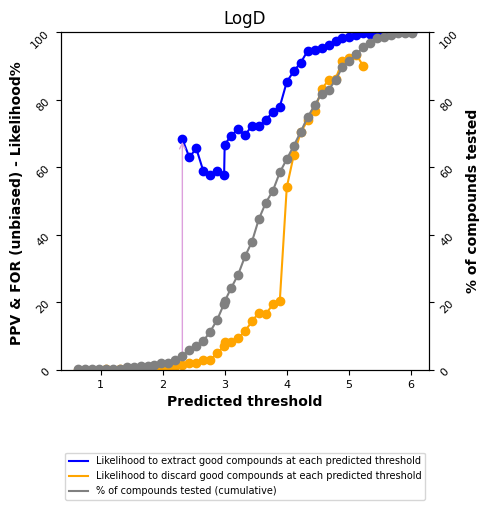

In [3]:
# Configure desired criterion and run the evaluation
config_dict.update(
    {
        "pos_class": "<=",
        "current_threshold": 3
    }
)
evaluate_pv(**config_dict)